In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time #helper libraries

# file is downloaded from finance.yahoo.com, 1.1.1997-1.1.2017
# training data = 1.1.1997 - 1.1.2007
# test data = 1.1.2007 - 1.1.2017
input_file="SweetPotato_Week_Price.csv"

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
df = read_csv(input_file)


# File dữ liệu đã được tính trung bình giá theo tuần

df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# take close price column[5]
all_y = df['Price'].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 24
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(600, input_shape=(1, look_back)))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=4, verbose=1)

Epoch 1/100


  4/143 [..............................] - ETA: 1:21 - loss: 0.2312

  8/143 [>.............................] - ETA: 43s - loss: 0.2401 

 12/143 [=>............................] - ETA: 29s - loss: 0.1979

 16/143 [==>...........................] - ETA: 23s - loss: 0.1739

 20/143 [===>..........................] - ETA: 20s - loss: 0.1510

 24/143 [====>.........................] - ETA: 16s - loss: 0.1387

 28/143 [====>.........................] - ETA: 14s - loss: 0.1234

 32/143 [=====>........................] - ETA: 13s - loss: 0.1103

 36/143 [======>.......................] - ETA: 11s - loss: 0.1031

 40/143 [=======>......................] - ETA: 10s - loss: 0.1033

 44/143 [========>.....................] - ETA: 9s - loss: 0.0968 

 48/143 [=========>....................] - ETA: 8s - loss: 0.0958

 52/143 [=========>....................] - ETA: 8s - loss: 0.0945

 56/143 [==========>...................] - ETA: 7s - loss: 0.0939

 60/143 [===========>..................] - ETA: 7s - loss: 0.0923

 64/143 [============>.................] - ETA: 6s - loss: 0.0919

 68/143 [=============>................] - ETA: 6s - loss: 0.0877

 72/143 [==============>...............] - ETA: 5s - loss: 0.0837

 76/143 [==============>...............] - ETA: 5s - loss: 0.0819

 80/143 [===============>..............] - ETA: 4s - loss: 0.0798

 84/143 [================>.............] - ETA: 4s - loss: 0.0769

 88/143 [=================>............] - ETA: 4s - loss: 0.0738

 92/143 [==================>...........] - ETA: 3s - loss: 0.0725

 96/143 [===================>..........] - ETA: 3s - loss: 0.0705

100/143 [===================>..........] - ETA: 2s - loss: 0.0677

104/143 [====================>.........] - ETA: 2s - loss: 0.0688

108/143 [=====================>........] - ETA: 2s - loss: 0.0671

112/143 [======================>.......] - ETA: 2s - loss: 0.0673

116/143 [=======================>......] - ETA: 1s - loss: 0.0681

120/143 [========================>.....] - ETA: 1s - loss: 0.0695

124/143 [=========================>....] - ETA: 1s - loss: 0.0683

128/143 [=========================>....] - ETA: 0s - loss: 0.0668

132/143 [==========================>...] - ETA: 0s - loss: 0.0657

136/143 [===========================>..] - ETA: 0s - loss: 0.0650

140/143 [============================>.] - ETA: 0s - loss: 0.0641

143/143 [==============================] - 9s 63ms/step - loss: 0.0635


Epoch 2/100


  4/143 [..............................] - ETA: 4s - loss: 0.0046

  8/143 [>.............................] - ETA: 5s - loss: 0.0214

 12/143 [=>............................] - ETA: 5s - loss: 0.0341

 16/143 [==>...........................] - ETA: 4s - loss: 0.0319

 20/143 [===>..........................] - ETA: 4s - loss: 0.0346

 24/143 [====>.........................] - ETA: 4s - loss: 0.0352

 28/143 [====>.........................] - ETA: 4s - loss: 0.0387

 32/143 [=====>........................] - ETA: 4s - loss: 0.0356

 36/143 [======>.......................] - ETA: 4s - loss: 0.0360

 40/143 [=======>......................] - ETA: 4s - loss: 0.0353

 44/143 [========>.....................] - ETA: 3s - loss: 0.0345

 48/143 [=========>....................] - ETA: 3s - loss: 0.0336

 52/143 [=========>....................] - ETA: 3s - loss: 0.0331

 56/143 [==========>...................] - ETA: 3s - loss: 0.0326

 60/143 [===========>..................] - ETA: 3s - loss: 0.0306

 64/143 [============>.................] - ETA: 3s - loss: 0.0295

 68/143 [=============>................] - ETA: 3s - loss: 0.0285

 72/143 [==============>...............] - ETA: 3s - loss: 0.0277

 76/143 [==============>...............] - ETA: 2s - loss: 0.0270

 80/143 [===============>..............] - ETA: 2s - loss: 0.0271

 84/143 [================>.............] - ETA: 2s - loss: 0.0282

 88/143 [=================>............] - ETA: 2s - loss: 0.0279

 92/143 [==================>...........] - ETA: 2s - loss: 0.0285

 96/143 [===================>..........] - ETA: 2s - loss: 0.0280

100/143 [===================>..........] - ETA: 1s - loss: 0.0271

104/143 [====================>.........] - ETA: 1s - loss: 0.0263

108/143 [=====================>........] - ETA: 1s - loss: 0.0261

112/143 [======================>.......] - ETA: 1s - loss: 0.0262

116/143 [=======================>......] - ETA: 1s - loss: 0.0255

120/143 [========================>.....] - ETA: 1s - loss: 0.0253

124/143 [=========================>....] - ETA: 0s - loss: 0.0246

128/143 [=========================>....] - ETA: 0s - loss: 0.0239

132/143 [==========================>...] - ETA: 0s - loss: 0.0235

136/143 [===========================>..] - ETA: 0s - loss: 0.0230

140/143 [============================>.] - ETA: 0s - loss: 0.0226

143/143 [==============================] - 7s 46ms/step - loss: 0.0223


Epoch 3/100


  4/143 [..............................] - ETA: 6s - loss: 0.0124

  8/143 [>.............................] - ETA: 5s - loss: 0.0178

 12/143 [=>............................] - ETA: 5s - loss: 0.0189

 16/143 [==>...........................] - ETA: 4s - loss: 0.0160

 20/143 [===>..........................] - ETA: 4s - loss: 0.0196

 24/143 [====>.........................] - ETA: 5s - loss: 0.0173

 28/143 [====>.........................] - ETA: 4s - loss: 0.0172

 32/143 [=====>........................] - ETA: 4s - loss: 0.0164

 36/143 [======>.......................] - ETA: 4s - loss: 0.0169

 40/143 [=======>......................] - ETA: 3s - loss: 0.0160

 44/143 [========>.....................] - ETA: 3s - loss: 0.0154

 48/143 [=========>....................] - ETA: 3s - loss: 0.0143

 52/143 [=========>....................] - ETA: 3s - loss: 0.0146

 56/143 [==========>...................] - ETA: 3s - loss: 0.0147

 60/143 [===========>..................] - ETA: 3s - loss: 0.0141

 64/143 [============>.................] - ETA: 3s - loss: 0.0139

 68/143 [=============>................] - ETA: 3s - loss: 0.0139

 72/143 [==============>...............] - ETA: 2s - loss: 0.0144

 76/143 [==============>...............] - ETA: 2s - loss: 0.0145

 80/143 [===============>..............] - ETA: 2s - loss: 0.0147

 84/143 [================>.............] - ETA: 2s - loss: 0.0148

 88/143 [=================>............] - ETA: 2s - loss: 0.0145

 92/143 [==================>...........] - ETA: 2s - loss: 0.0149

 96/143 [===================>..........] - ETA: 2s - loss: 0.0147

100/143 [===================>..........] - ETA: 1s - loss: 0.0144

104/143 [====================>.........] - ETA: 1s - loss: 0.0145

108/143 [=====================>........] - ETA: 1s - loss: 0.0156

112/143 [======================>.......] - ETA: 1s - loss: 0.0155

116/143 [=======================>......] - ETA: 1s - loss: 0.0153

120/143 [========================>.....] - ETA: 1s - loss: 0.0152

124/143 [=========================>....] - ETA: 0s - loss: 0.0150

128/143 [=========================>....] - ETA: 0s - loss: 0.0147

132/143 [==========================>...] - ETA: 0s - loss: 0.0144

136/143 [===========================>..] - ETA: 0s - loss: 0.0143

140/143 [============================>.] - ETA: 0s - loss: 0.0142

143/143 [==============================] - 7s 45ms/step - loss: 0.0141


Epoch 4/100


  4/143 [..............................] - ETA: 13s - loss: 0.0061

  8/143 [>.............................] - ETA: 10s - loss: 0.0093

 12/143 [=>............................] - ETA: 8s - loss: 0.0101 

 16/143 [==>...........................] - ETA: 8s - loss: 0.0085

 20/143 [===>..........................] - ETA: 8s - loss: 0.0074

 24/143 [====>.........................] - ETA: 7s - loss: 0.0065

 28/143 [====>.........................] - ETA: 6s - loss: 0.0111

 32/143 [=====>........................] - ETA: 6s - loss: 0.0102

 36/143 [======>.......................] - ETA: 5s - loss: 0.0098

 40/143 [=======>......................] - ETA: 5s - loss: 0.0097

 44/143 [========>.....................] - ETA: 5s - loss: 0.0105

 48/143 [=========>....................] - ETA: 5s - loss: 0.0117

 52/143 [=========>....................] - ETA: 4s - loss: 0.0130

 56/143 [==========>...................] - ETA: 4s - loss: 0.0122

 60/143 [===========>..................] - ETA: 4s - loss: 0.0119

 64/143 [============>.................] - ETA: 4s - loss: 0.0128

 68/143 [=============>................] - ETA: 4s - loss: 0.0122

 72/143 [==============>...............] - ETA: 3s - loss: 0.0119

 76/143 [==============>...............] - ETA: 3s - loss: 0.0121

 80/143 [===============>..............] - ETA: 3s - loss: 0.0118

 84/143 [================>.............] - ETA: 3s - loss: 0.0116

 88/143 [=================>............] - ETA: 2s - loss: 0.0113

 92/143 [==================>...........] - ETA: 2s - loss: 0.0113

 96/143 [===================>..........] - ETA: 2s - loss: 0.0114

100/143 [===================>..........] - ETA: 2s - loss: 0.0114

104/143 [====================>.........] - ETA: 1s - loss: 0.0121

108/143 [=====================>........] - ETA: 1s - loss: 0.0118

112/143 [======================>.......] - ETA: 1s - loss: 0.0115

116/143 [=======================>......] - ETA: 1s - loss: 0.0112

120/143 [========================>.....] - ETA: 1s - loss: 0.0113

124/143 [=========================>....] - ETA: 0s - loss: 0.0114

128/143 [=========================>....] - ETA: 0s - loss: 0.0112

132/143 [==========================>...] - ETA: 0s - loss: 0.0110

136/143 [===========================>..] - ETA: 0s - loss: 0.0110

140/143 [============================>.] - ETA: 0s - loss: 0.0112

143/143 [==============================] - 7s 49ms/step - loss: 0.0111


Epoch 5/100
  4/143 [..............................] - ETA: 6s - loss: 0.0043

  8/143 [>.............................] - ETA: 6s - loss: 0.0086

 12/143 [=>............................] - ETA: 5s - loss: 0.0071

 16/143 [==>...........................] - ETA: 6s - loss: 0.0109

 20/143 [===>..........................] - ETA: 5s - loss: 0.0098

 24/143 [====>.........................] - ETA: 5s - loss: 0.0089

 28/143 [====>.........................] - ETA: 5s - loss: 0.0090

 32/143 [=====>........................] - ETA: 5s - loss: 0.0099

 36/143 [======>.......................] - ETA: 4s - loss: 0.0105

 40/143 [=======>......................] - ETA: 4s - loss: 0.0101

 44/143 [========>.....................] - ETA: 4s - loss: 0.0098

 48/143 [=========>....................] - ETA: 4s - loss: 0.0096

 52/143 [=========>....................] - ETA: 3s - loss: 0.0092

 56/143 [==========>...................] - ETA: 3s - loss: 0.0087

 60/143 [===========>..................] - ETA: 3s - loss: 0.0087

 64/143 [============>.................] - ETA: 3s - loss: 0.0086

 68/143 [=============>................] - ETA: 3s - loss: 0.0086

 72/143 [==============>...............] - ETA: 3s - loss: 0.0095

 76/143 [==============>...............] - ETA: 2s - loss: 0.0095

 80/143 [===============>..............] - ETA: 2s - loss: 0.0098

 84/143 [================>.............] - ETA: 2s - loss: 0.0099

 88/143 [=================>............] - ETA: 2s - loss: 0.0098

 92/143 [==================>...........] - ETA: 2s - loss: 0.0096

 96/143 [===================>..........] - ETA: 2s - loss: 0.0102

100/143 [===================>..........] - ETA: 1s - loss: 0.0100

104/143 [====================>.........] - ETA: 1s - loss: 0.0100

108/143 [=====================>........] - ETA: 1s - loss: 0.0108

112/143 [======================>.......] - ETA: 1s - loss: 0.0107

116/143 [=======================>......] - ETA: 1s - loss: 0.0111

120/143 [========================>.....] - ETA: 0s - loss: 0.0115

124/143 [=========================>....] - ETA: 0s - loss: 0.0112

128/143 [=========================>....] - ETA: 0s - loss: 0.0112

132/143 [==========================>...] - ETA: 0s - loss: 0.0118

136/143 [===========================>..] - ETA: 0s - loss: 0.0117

140/143 [============================>.] - ETA: 0s - loss: 0.0119

143/143 [==============================] - 6s 45ms/step - loss: 0.0125


Epoch 6/100


  4/143 [..............................] - ETA: 10s - loss: 0.0042

  8/143 [>.............................] - ETA: 8s - loss: 0.0047 

 12/143 [=>............................] - ETA: 7s - loss: 0.0062

 16/143 [==>...........................] - ETA: 7s - loss: 0.0062

 20/143 [===>..........................] - ETA: 6s - loss: 0.0077

 24/143 [====>.........................] - ETA: 6s - loss: 0.0070

 28/143 [====>.........................] - ETA: 6s - loss: 0.0077

 32/143 [=====>........................] - ETA: 5s - loss: 0.0083

 36/143 [======>.......................] - ETA: 5s - loss: 0.0080

 40/143 [=======>......................] - ETA: 5s - loss: 0.0083

 44/143 [========>.....................] - ETA: 5s - loss: 0.0084

 48/143 [=========>....................] - ETA: 4s - loss: 0.0091

 52/143 [=========>....................] - ETA: 4s - loss: 0.0088

 56/143 [==========>...................] - ETA: 4s - loss: 0.0085

 60/143 [===========>..................] - ETA: 4s - loss: 0.0085

 64/143 [============>.................] - ETA: 3s - loss: 0.0084

 68/143 [=============>................] - ETA: 3s - loss: 0.0081

 72/143 [==============>...............] - ETA: 3s - loss: 0.0091

 76/143 [==============>...............] - ETA: 3s - loss: 0.0086

 80/143 [===============>..............] - ETA: 3s - loss: 0.0086

 84/143 [================>.............] - ETA: 2s - loss: 0.0085

 88/143 [=================>............] - ETA: 2s - loss: 0.0082

 92/143 [==================>...........] - ETA: 2s - loss: 0.0081

 96/143 [===================>..........] - ETA: 2s - loss: 0.0090

100/143 [===================>..........] - ETA: 2s - loss: 0.0091

104/143 [====================>.........] - ETA: 1s - loss: 0.0088

108/143 [=====================>........] - ETA: 1s - loss: 0.0085

112/143 [======================>.......] - ETA: 1s - loss: 0.0089

116/143 [=======================>......] - ETA: 1s - loss: 0.0089

120/143 [========================>.....] - ETA: 1s - loss: 0.0090

124/143 [=========================>....] - ETA: 0s - loss: 0.0097

128/143 [=========================>....] - ETA: 0s - loss: 0.0100

132/143 [==========================>...] - ETA: 0s - loss: 0.0099

136/143 [===========================>..] - ETA: 0s - loss: 0.0100



140/143 [============================>.] - ETA: 0s - loss: 0.0098

143/143 [==============================] - 7s 48ms/step - loss: 0.0097


Epoch 7/100


  4/143 [..............................] - ETA: 3s - loss: 0.0206

  8/143 [>.............................] - ETA: 3s - loss: 0.0127

 12/143 [=>............................] - ETA: 4s - loss: 0.0174

 16/143 [==>...........................] - ETA: 4s - loss: 0.0149

 20/143 [===>..........................] - ETA: 4s - loss: 0.0131

 24/143 [====>.........................] - ETA: 4s - loss: 0.0118

 28/143 [====>.........................] - ETA: 5s - loss: 0.0116

 32/143 [=====>........................] - ETA: 5s - loss: 0.0107

 36/143 [======>.......................] - ETA: 5s - loss: 0.0100

 40/143 [=======>......................] - ETA: 5s - loss: 0.0095

 44/143 [========>.....................] - ETA: 4s - loss: 0.0094

 48/143 [=========>....................] - ETA: 4s - loss: 0.0107

 52/143 [=========>....................] - ETA: 4s - loss: 0.0106

 56/143 [==========>...................] - ETA: 4s - loss: 0.0107

 60/143 [===========>..................] - ETA: 3s - loss: 0.0110

 64/143 [============>.................] - ETA: 3s - loss: 0.0107

 68/143 [=============>................] - ETA: 3s - loss: 0.0102

 72/143 [==============>...............] - ETA: 3s - loss: 0.0100

 76/143 [==============>...............] - ETA: 2s - loss: 0.0100

 80/143 [===============>..............] - ETA: 2s - loss: 0.0097

 84/143 [================>.............] - ETA: 2s - loss: 0.0096

 88/143 [=================>............] - ETA: 2s - loss: 0.0100

 92/143 [==================>...........] - ETA: 2s - loss: 0.0097

 96/143 [===================>..........] - ETA: 2s - loss: 0.0098

100/143 [===================>..........] - ETA: 1s - loss: 0.0097

104/143 [====================>.........] - ETA: 1s - loss: 0.0097

108/143 [=====================>........] - ETA: 1s - loss: 0.0098

112/143 [======================>.......] - ETA: 1s - loss: 0.0095

116/143 [=======================>......] - ETA: 1s - loss: 0.0096

120/143 [========================>.....] - ETA: 1s - loss: 0.0101

124/143 [=========================>....] - ETA: 0s - loss: 0.0106

128/143 [=========================>....] - ETA: 0s - loss: 0.0103

132/143 [==========================>...] - ETA: 0s - loss: 0.0101

136/143 [===========================>..] - ETA: 0s - loss: 0.0099



140/143 [============================>.] - ETA: 0s - loss: 0.0097

143/143 [==============================] - 6s 45ms/step - loss: 0.0095


Epoch 8/100
  4/143 [..............................] - ETA: 4s - loss: 0.0059

  8/143 [>.............................] - ETA: 5s - loss: 0.0077

 12/143 [=>............................] - ETA: 5s - loss: 0.0082

 16/143 [==>...........................] - ETA: 5s - loss: 0.0106

 20/143 [===>..........................] - ETA: 5s - loss: 0.0099

 24/143 [====>.........................] - ETA: 5s - loss: 0.0089

 28/143 [====>.........................] - ETA: 5s - loss: 0.0078

 32/143 [=====>........................] - ETA: 5s - loss: 0.0079

 36/143 [======>.......................] - ETA: 5s - loss: 0.0075

 40/143 [=======>......................] - ETA: 5s - loss: 0.0077

 44/143 [========>.....................] - ETA: 4s - loss: 0.0078

 48/143 [=========>....................] - ETA: 4s - loss: 0.0075

 52/143 [=========>....................] - ETA: 4s - loss: 0.0073

 56/143 [==========>...................] - ETA: 4s - loss: 0.0079

 60/143 [===========>..................] - ETA: 4s - loss: 0.0075

 64/143 [============>.................] - ETA: 4s - loss: 0.0075

 68/143 [=============>................] - ETA: 3s - loss: 0.0071

 72/143 [==============>...............] - ETA: 3s - loss: 0.0070

 76/143 [==============>...............] - ETA: 3s - loss: 0.0067

 80/143 [===============>..............] - ETA: 3s - loss: 0.0073

 84/143 [================>.............] - ETA: 2s - loss: 0.0081

 88/143 [=================>............] - ETA: 2s - loss: 0.0079

 92/143 [==================>...........] - ETA: 2s - loss: 0.0078

 96/143 [===================>..........] - ETA: 2s - loss: 0.0078

100/143 [===================>..........] - ETA: 2s - loss: 0.0077

104/143 [====================>.........] - ETA: 1s - loss: 0.0083

108/143 [=====================>........] - ETA: 1s - loss: 0.0085

112/143 [======================>.......] - ETA: 1s - loss: 0.0085

116/143 [=======================>......] - ETA: 1s - loss: 0.0084

120/143 [========================>.....] - ETA: 1s - loss: 0.0083

124/143 [=========================>....] - ETA: 0s - loss: 0.0086

128/143 [=========================>....] - ETA: 0s - loss: 0.0084

132/143 [==========================>...] - ETA: 0s - loss: 0.0084

136/143 [===========================>..] - ETA: 0s - loss: 0.0088

140/143 [============================>.] - ETA: 0s - loss: 0.0091

143/143 [==============================] - 7s 52ms/step - loss: 0.0092


Epoch 9/100


  4/143 [..............................] - ETA: 7s - loss: 0.0049

  8/143 [>.............................] - ETA: 9s - loss: 0.0056

 12/143 [=>............................] - ETA: 7s - loss: 0.0080

 16/143 [==>...........................] - ETA: 6s - loss: 0.0076

 20/143 [===>..........................] - ETA: 6s - loss: 0.0079

 24/143 [====>.........................] - ETA: 5s - loss: 0.0067

 28/143 [====>.........................] - ETA: 5s - loss: 0.0068

 32/143 [=====>........................] - ETA: 5s - loss: 0.0065

 36/143 [======>.......................] - ETA: 5s - loss: 0.0063

 40/143 [=======>......................] - ETA: 4s - loss: 0.0064

 44/143 [========>.....................] - ETA: 4s - loss: 0.0062

 48/143 [=========>....................] - ETA: 4s - loss: 0.0060

 52/143 [=========>....................] - ETA: 4s - loss: 0.0089

 56/143 [==========>...................] - ETA: 3s - loss: 0.0084

 60/143 [===========>..................] - ETA: 3s - loss: 0.0091

 64/143 [============>.................] - ETA: 3s - loss: 0.0091

 68/143 [=============>................] - ETA: 3s - loss: 0.0088

 72/143 [==============>...............] - ETA: 3s - loss: 0.0086

 76/143 [==============>...............] - ETA: 3s - loss: 0.0088

 80/143 [===============>..............] - ETA: 2s - loss: 0.0088

 84/143 [================>.............] - ETA: 2s - loss: 0.0105

 88/143 [=================>............] - ETA: 2s - loss: 0.0104

 92/143 [==================>...........] - ETA: 2s - loss: 0.0102

 96/143 [===================>..........] - ETA: 2s - loss: 0.0101

100/143 [===================>..........] - ETA: 1s - loss: 0.0098

104/143 [====================>.........] - ETA: 1s - loss: 0.0098

108/143 [=====================>........] - ETA: 1s - loss: 0.0099

112/143 [======================>.......] - ETA: 1s - loss: 0.0097

116/143 [=======================>......] - ETA: 1s - loss: 0.0095

120/143 [========================>.....] - ETA: 1s - loss: 0.0100

124/143 [=========================>....] - ETA: 0s - loss: 0.0097

128/143 [=========================>....] - ETA: 0s - loss: 0.0100

132/143 [==========================>...] - ETA: 0s - loss: 0.0097

136/143 [===========================>..] - ETA: 0s - loss: 0.0095

140/143 [============================>.] - ETA: 0s - loss: 0.0093

143/143 [==============================] - 7s 47ms/step - loss: 0.0093


Epoch 10/100
  4/143 [..............................] - ETA: 6s - loss: 0.0237

  8/143 [>.............................] - ETA: 5s - loss: 0.0146

 12/143 [=>............................] - ETA: 5s - loss: 0.0115

 16/143 [==>...........................] - ETA: 5s - loss: 0.0114

 20/143 [===>..........................] - ETA: 5s - loss: 0.0117

 24/143 [====>.........................] - ETA: 5s - loss: 0.0103

 28/143 [====>.........................] - ETA: 5s - loss: 0.0098

 32/143 [=====>........................] - ETA: 5s - loss: 0.0087

 36/143 [======>.......................] - ETA: 5s - loss: 0.0082

 40/143 [=======>......................] - ETA: 5s - loss: 0.0078

 44/143 [========>.....................] - ETA: 4s - loss: 0.0078

 48/143 [=========>....................] - ETA: 5s - loss: 0.0075

 52/143 [=========>....................] - ETA: 4s - loss: 0.0075

 56/143 [==========>...................] - ETA: 4s - loss: 0.0073

 60/143 [===========>..................] - ETA: 4s - loss: 0.0073

 64/143 [============>.................] - ETA: 4s - loss: 0.0072

 68/143 [=============>................] - ETA: 3s - loss: 0.0070

 72/143 [==============>...............] - ETA: 3s - loss: 0.0070

 76/143 [==============>...............] - ETA: 3s - loss: 0.0072

 80/143 [===============>..............] - ETA: 2s - loss: 0.0071

 84/143 [================>.............] - ETA: 2s - loss: 0.0069

 88/143 [=================>............] - ETA: 2s - loss: 0.0068

 92/143 [==================>...........] - ETA: 2s - loss: 0.0067

 96/143 [===================>..........] - ETA: 2s - loss: 0.0068

100/143 [===================>..........] - ETA: 1s - loss: 0.0072

104/143 [====================>.........] - ETA: 1s - loss: 0.0070

108/143 [=====================>........] - ETA: 1s - loss: 0.0076

112/143 [======================>.......] - ETA: 1s - loss: 0.0076

116/143 [=======================>......] - ETA: 1s - loss: 0.0074

120/143 [========================>.....] - ETA: 1s - loss: 0.0072

124/143 [=========================>....] - ETA: 0s - loss: 0.0075

128/143 [=========================>....] - ETA: 0s - loss: 0.0075

132/143 [==========================>...] - ETA: 0s - loss: 0.0074

136/143 [===========================>..] - ETA: 0s - loss: 0.0072

140/143 [============================>.] - ETA: 0s - loss: 0.0075

143/143 [==============================] - 7s 47ms/step - loss: 0.0074


Epoch 11/100
  4/143 [..............................] - ETA: 6s - loss: 0.0037

  8/143 [>.............................] - ETA: 4s - loss: 0.0107

 12/143 [=>............................] - ETA: 5s - loss: 0.0099

 16/143 [==>...........................] - ETA: 4s - loss: 0.0079

 20/143 [===>..........................] - ETA: 4s - loss: 0.0071

 24/143 [====>.........................] - ETA: 4s - loss: 0.0077

 28/143 [====>.........................] - ETA: 4s - loss: 0.0084

 32/143 [=====>........................] - ETA: 4s - loss: 0.0097

 36/143 [======>.......................] - ETA: 4s - loss: 0.0116

 40/143 [=======>......................] - ETA: 4s - loss: 0.0107

 44/143 [========>.....................] - ETA: 4s - loss: 0.0103

 48/143 [=========>....................] - ETA: 4s - loss: 0.0101

 52/143 [=========>....................] - ETA: 4s - loss: 0.0095

 56/143 [==========>...................] - ETA: 4s - loss: 0.0093

 60/143 [===========>..................] - ETA: 4s - loss: 0.0093

 64/143 [============>.................] - ETA: 4s - loss: 0.0093

 68/143 [=============>................] - ETA: 3s - loss: 0.0105

 72/143 [==============>...............] - ETA: 3s - loss: 0.0104

 76/143 [==============>...............] - ETA: 3s - loss: 0.0111

 80/143 [===============>..............] - ETA: 3s - loss: 0.0109

 84/143 [================>.............] - ETA: 2s - loss: 0.0107

 88/143 [=================>............] - ETA: 2s - loss: 0.0108

 92/143 [==================>...........] - ETA: 2s - loss: 0.0105

 96/143 [===================>..........] - ETA: 2s - loss: 0.0104

100/143 [===================>..........] - ETA: 2s - loss: 0.0102

104/143 [====================>.........] - ETA: 1s - loss: 0.0104

108/143 [=====================>........] - ETA: 1s - loss: 0.0101

112/143 [======================>.......] - ETA: 1s - loss: 0.0098

116/143 [=======================>......] - ETA: 1s - loss: 0.0097

120/143 [========================>.....] - ETA: 1s - loss: 0.0096

124/143 [=========================>....] - ETA: 0s - loss: 0.0094

128/143 [=========================>....] - ETA: 0s - loss: 0.0100

132/143 [==========================>...] - ETA: 0s - loss: 0.0099

136/143 [===========================>..] - ETA: 0s - loss: 0.0098

140/143 [============================>.] - ETA: 0s - loss: 0.0096

143/143 [==============================] - 7s 46ms/step - loss: 0.0095


Epoch 12/100


  4/143 [..............................] - ETA: 10s - loss: 0.0050

  8/143 [>.............................] - ETA: 7s - loss: 0.0033 

 12/143 [=>............................] - ETA: 6s - loss: 0.0040

 16/143 [==>...........................] - ETA: 8s - loss: 0.0072

 20/143 [===>..........................] - ETA: 8s - loss: 0.0064

 24/143 [====>.........................] - ETA: 7s - loss: 0.0084

 28/143 [====>.........................] - ETA: 6s - loss: 0.0081

 32/143 [=====>........................] - ETA: 6s - loss: 0.0075

 36/143 [======>.......................] - ETA: 5s - loss: 0.0069

 40/143 [=======>......................] - ETA: 5s - loss: 0.0065

 44/143 [========>.....................] - ETA: 4s - loss: 0.0061

 48/143 [=========>....................] - ETA: 4s - loss: 0.0089

 52/143 [=========>....................] - ETA: 4s - loss: 0.0087

 56/143 [==========>...................] - ETA: 3s - loss: 0.0086

 60/143 [===========>..................] - ETA: 3s - loss: 0.0087



 64/143 [============>.................] - ETA: 3s - loss: 0.0082

 68/143 [=============>................] - ETA: 3s - loss: 0.0082

 72/143 [==============>...............] - ETA: 3s - loss: 0.0086

 76/143 [==============>...............] - ETA: 2s - loss: 0.0084

 80/143 [===============>..............] - ETA: 2s - loss: 0.0081

 84/143 [================>.............] - ETA: 2s - loss: 0.0079

 88/143 [=================>............] - ETA: 2s - loss: 0.0079

 92/143 [==================>...........] - ETA: 2s - loss: 0.0082

 96/143 [===================>..........] - ETA: 2s - loss: 0.0081

100/143 [===================>..........] - ETA: 1s - loss: 0.0081

104/143 [====================>.........] - ETA: 1s - loss: 0.0082

108/143 [=====================>........] - ETA: 1s - loss: 0.0085

112/143 [======================>.......] - ETA: 1s - loss: 0.0088

116/143 [=======================>......] - ETA: 1s - loss: 0.0094

120/143 [========================>.....] - ETA: 1s - loss: 0.0098

124/143 [=========================>....] - ETA: 0s - loss: 0.0098

128/143 [=========================>....] - ETA: 0s - loss: 0.0098

132/143 [==========================>...] - ETA: 0s - loss: 0.0097

136/143 [===========================>..] - ETA: 0s - loss: 0.0099

140/143 [============================>.] - ETA: 0s - loss: 0.0099

143/143 [==============================] - 7s 47ms/step - loss: 0.0104


Epoch 13/100
  4/143 [..............................] - ETA: 6s - loss: 0.0078

  8/143 [>.............................] - ETA: 5s - loss: 0.0076

 12/143 [=>............................] - ETA: 5s - loss: 0.0086

 16/143 [==>...........................] - ETA: 4s - loss: 0.0104

 20/143 [===>..........................] - ETA: 4s - loss: 0.0092

 24/143 [====>.........................] - ETA: 5s - loss: 0.0083

 28/143 [====>.........................] - ETA: 5s - loss: 0.0099

 32/143 [=====>........................] - ETA: 5s - loss: 0.0104

 36/143 [======>.......................] - ETA: 5s - loss: 0.0095

 40/143 [=======>......................] - ETA: 5s - loss: 0.0087

 44/143 [========>.....................] - ETA: 5s - loss: 0.0084

 48/143 [=========>....................] - ETA: 4s - loss: 0.0083

 52/143 [=========>....................] - ETA: 4s - loss: 0.0078

 56/143 [==========>...................] - ETA: 4s - loss: 0.0078

 60/143 [===========>..................] - ETA: 4s - loss: 0.0080

 64/143 [============>.................] - ETA: 3s - loss: 0.0075

 68/143 [=============>................] - ETA: 3s - loss: 0.0084

 72/143 [==============>...............] - ETA: 3s - loss: 0.0085

 76/143 [==============>...............] - ETA: 3s - loss: 0.0087

In [6]:
# Training Phase
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 600)               1500000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 601       
Total params: 1,500,601
Trainable params: 1,500,601
Non-trainable params: 0
_________________________________________________________________


In [7]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = mean_squared_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict






Train Score: 6424.72 MSE
Test Score: 8207.05 MSE


testPrices:


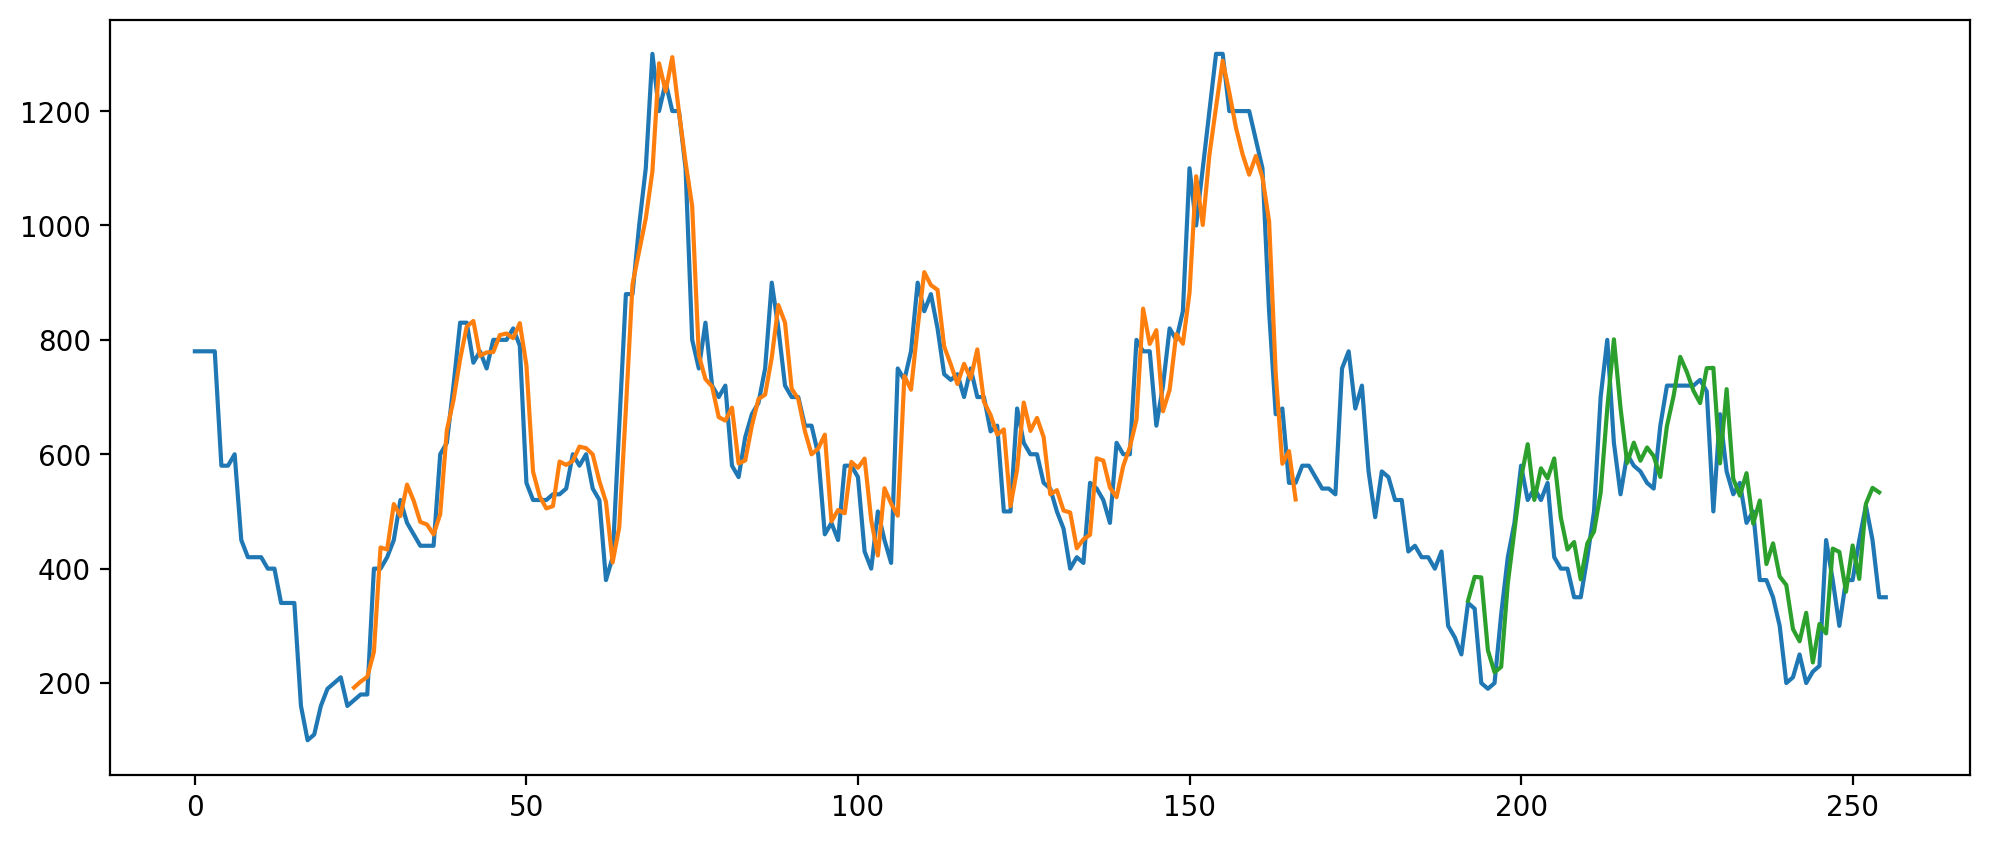

In [4]:
# plot baseline and predictions
plt.figure(figsize=(12,5), dpi=100)
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])
# export prediction and actual prices
#df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
#df.to_csv("lstm_result.csv", sep=';', index=None)

# plot the actual price, prediction in test data=red line, actual price=blue line
plt.plot(testPredictPlot)
plt.show()

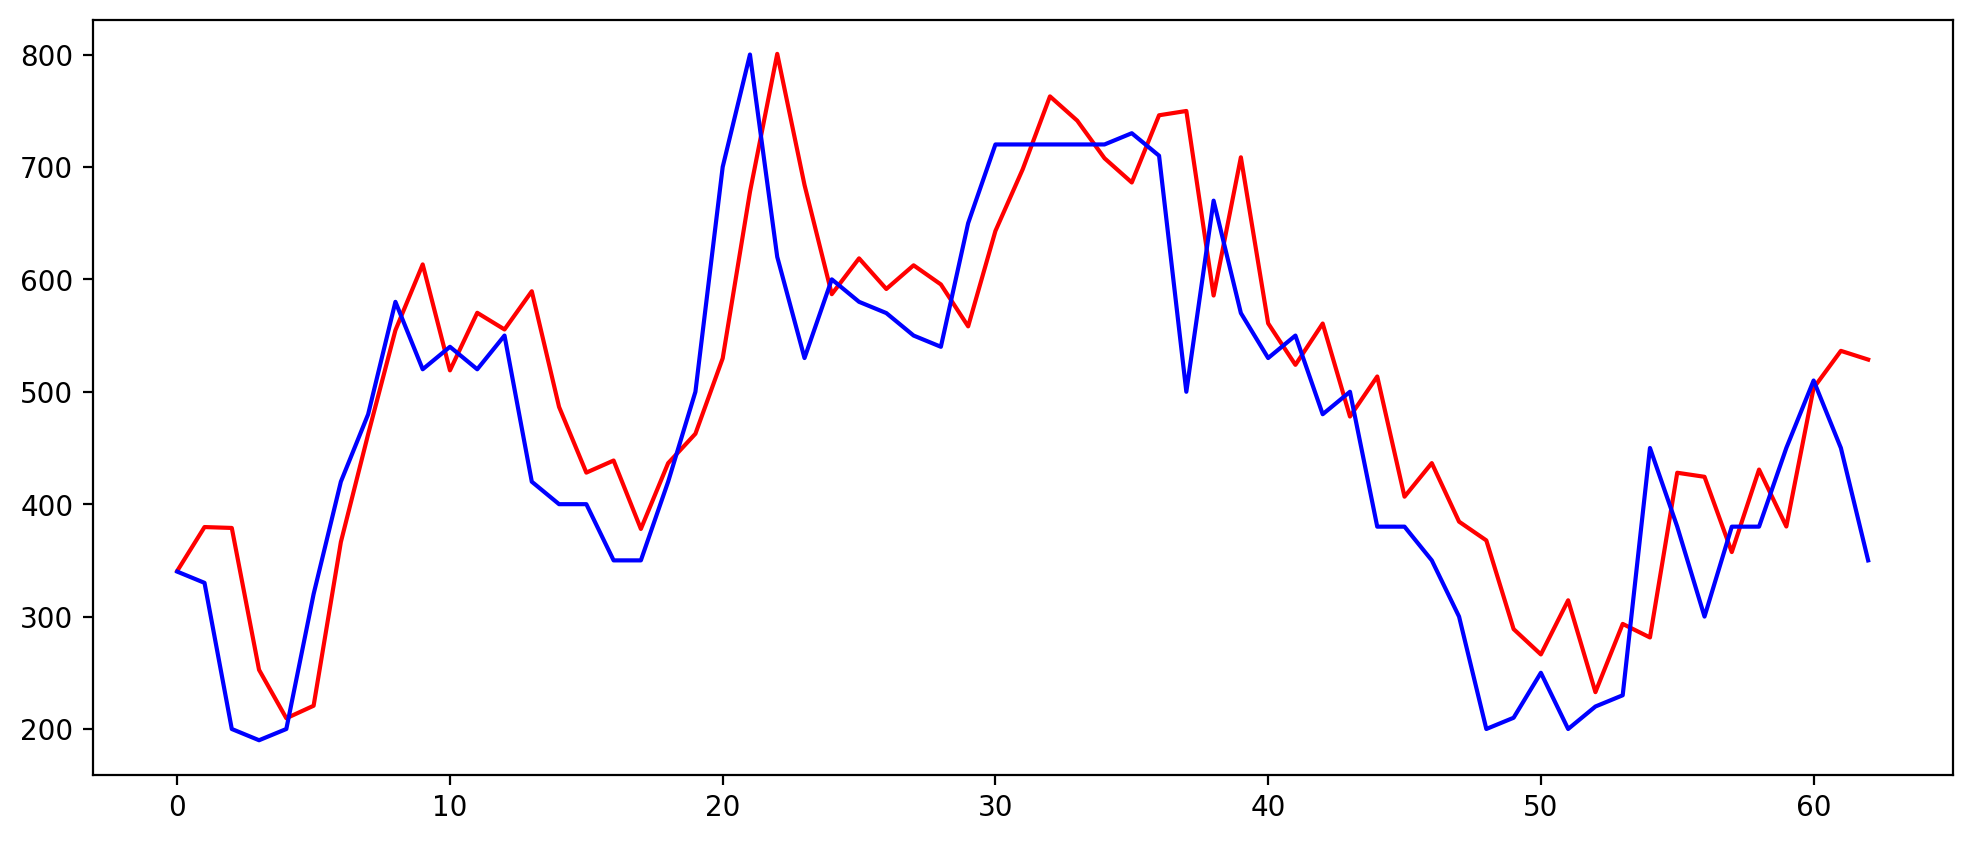

In [8]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(testPredict, color='r')
plt.plot(testY[0], color='blue')
plt.show()

Test Score: 122.60 MSE


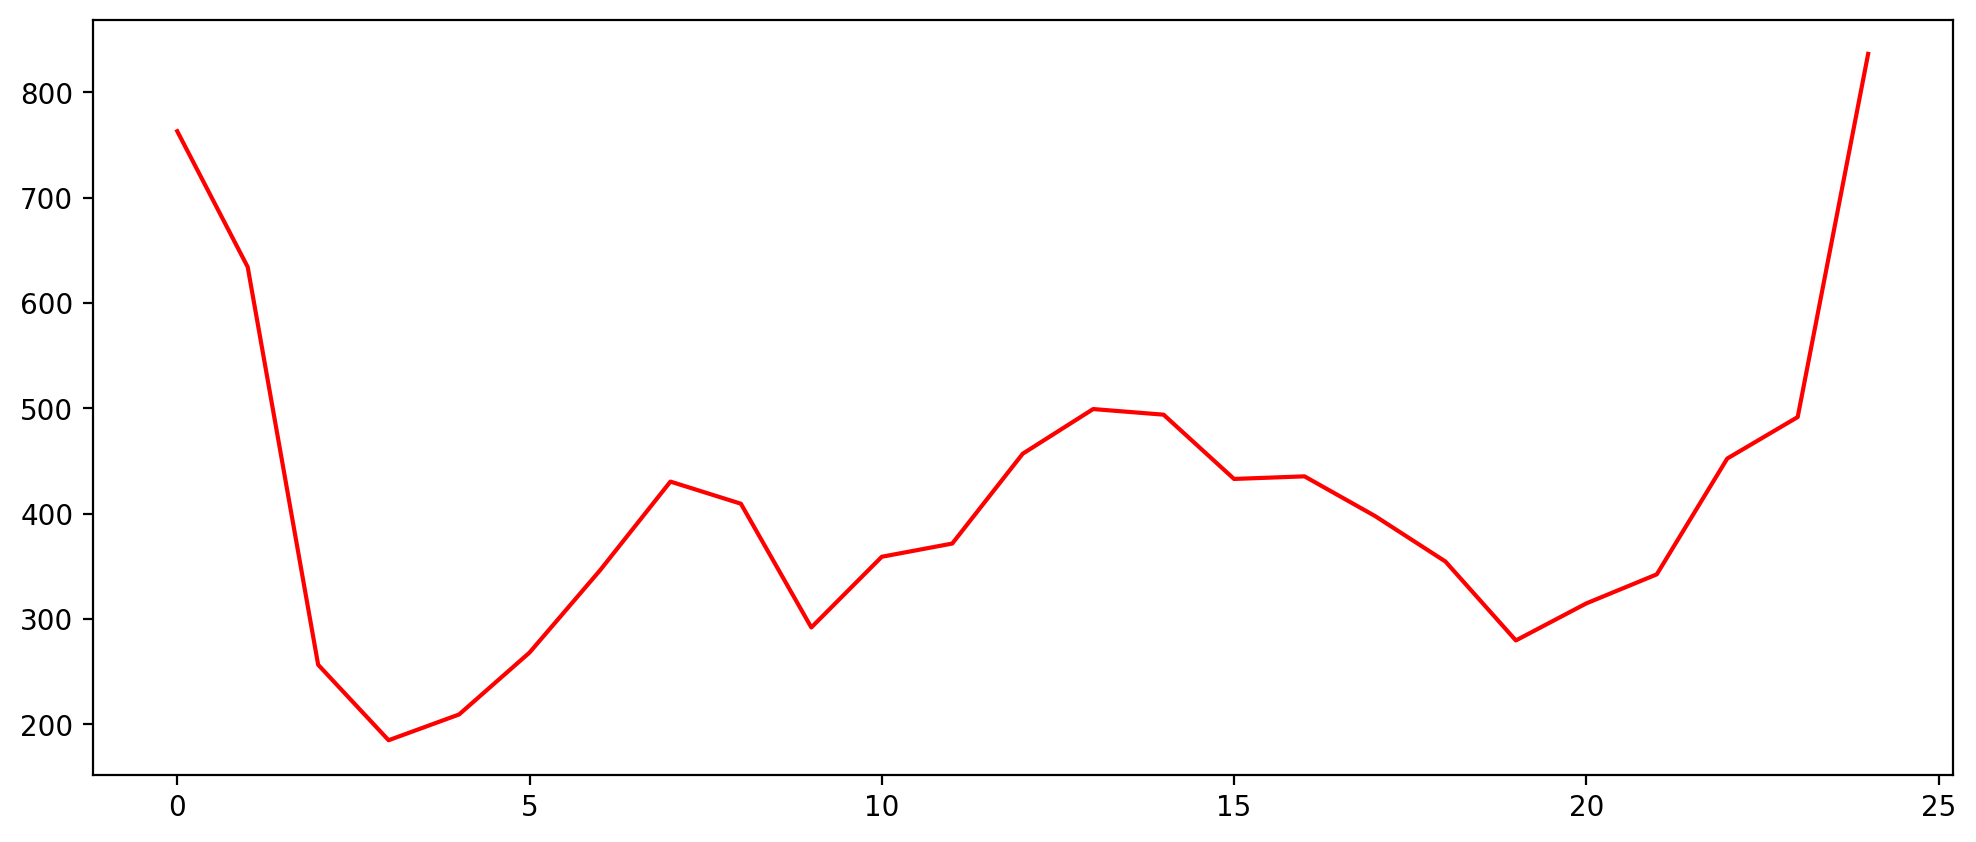

In [9]:
# Pridic 2020
input_file='LSTM24.csv'
df = read_csv(input_file)

#df= read_csv(input_file, parse_dates=["Date"], index_col="Date")
df.index
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')



# take close price column[5]
all_y = df['Price'].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# reshape into X=t and Y=t+1, timestep 240
look_back = 24

testX, testY = create_dataset(dataset, look_back)

# reshape input to be [samples, time steps, features]
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# make predictions
testPredict = model.predict(testX)

# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f MSE' % (testScore))
plt.figure(figsize=(12,5), dpi=100)
plt.plot(testPredict, color='r')
#plt.plot(testY[0], color='blue')
plt.show()